In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("grandmaster07/student-exam-performance-dataset-analysis")

print("Path to dataset files:", path)


C:\Users\piyus\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\piyus\.cache\kagglehub\datasets\grandmaster07\student-exam-performance-dataset-analysis\versions\1


In [69]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = os.path.join(path, "StudentPerformanceFactors.csv")

data= pd.read_csv(file_path)
df=pd.DataFrame(data)
df.head(15)



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [3]:
df.isnull().sum()
df['Parental_Education_Level'].fillna(df['Parental_Education_Level']=='Postgraduate')
df['Distance_from_Home'].fillna(df['Distance_from_Home']=='Moderate')
df['Teacher_Quality'].fillna(df['Teacher_Quality']=='Mediume',)
df.shape
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


<Axes: ylabel='Hours_Studied'>

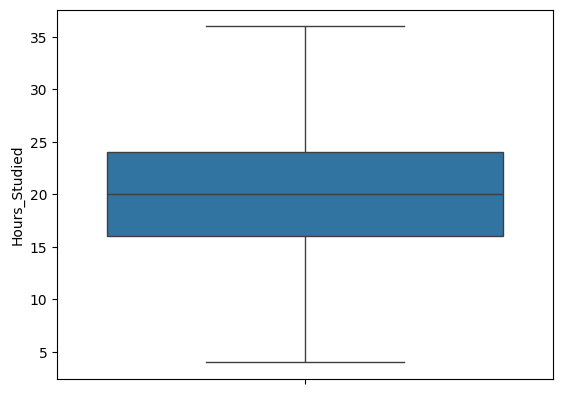

In [71]:
IQR = 24.000000-16.000000	
UF= 24.000000 + (1.5* IQR)
LF = 16.000000	- (1.5* IQR)

# replace outliers with median (19)
df.loc[
    (df['Hours_Studied'] > UF) | (df['Hours_Studied'] < LF),
    'Hours_Studied'] = 19

import seaborn as sns
sns.boxplot(df['Hours_Studied'])


<Axes: ylabel='Exam_Score'>

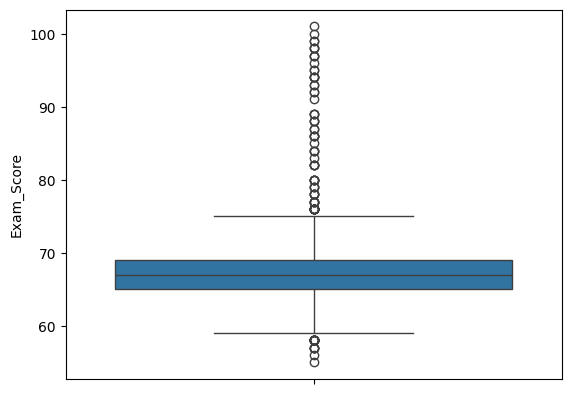

In [72]:
sns.boxplot(df['Exam_Score'])

<Axes: ylabel='Attendance'>

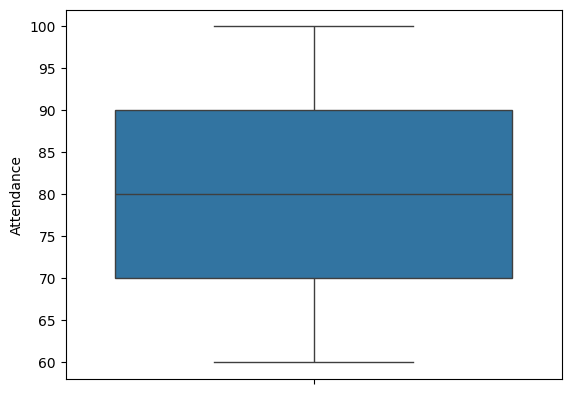

In [73]:
sns.boxplot(df['Attendance'])

<Axes: ylabel='Tutoring_Sessions'>

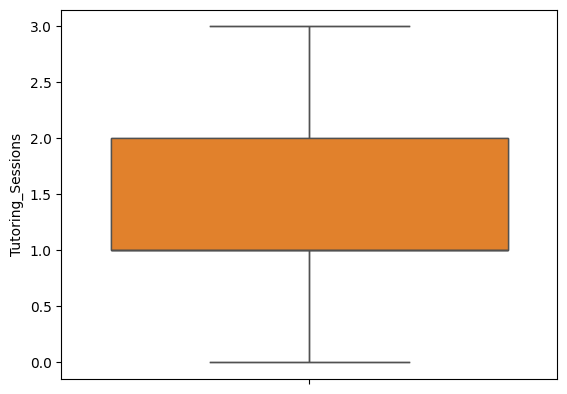

In [75]:
sns.boxplot(df['Tutoring_Sessions'])
IQR=1
UF=2+(1.5*IQR)
LF = 1 - (1.5 *IQR)
df.loc[
    (df['Tutoring_Sessions'] > UF) | (df['Tutoring_Sessions'] < LF),
    'Tutoring_Sessions'] = 1

import seaborn as sns
sns.boxplot(df['Tutoring_Sessions'])


<Axes: ylabel='Previous_Scores'>

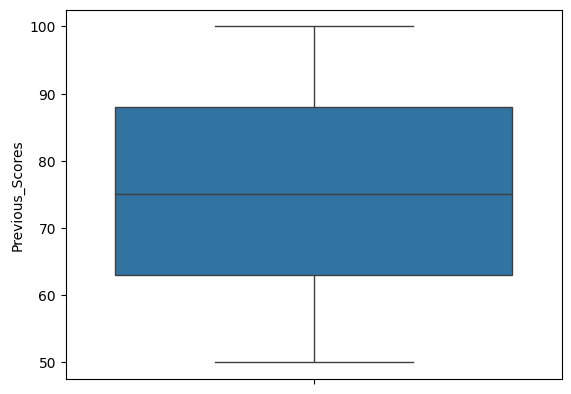

In [13]:
sns.boxplot(df['Previous_Scores'])

<Axes: ylabel='Sleep_Hours'>

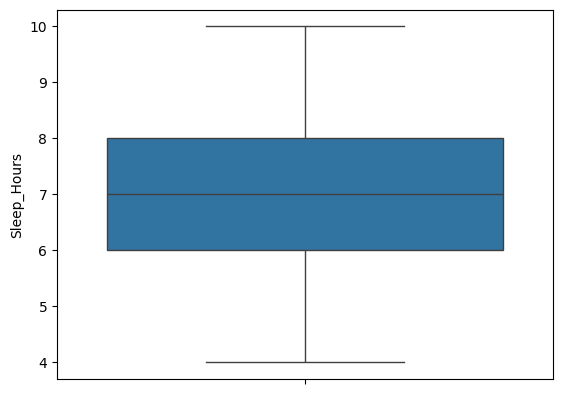

In [76]:
sns.boxplot(df['Sleep_Hours'])

<Axes: ylabel='Physical_Activity'>

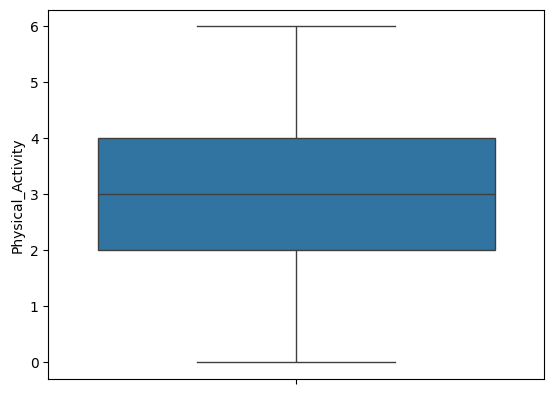

In [17]:
sns.boxplot(df['Physical_Activity'])

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Parental_Involvement']= le.fit_transform(df['Parental_Involvement'])
le1=LabelEncoder()
df['Access_to_Resources']= le1.fit_transform(df['Access_to_Resources'])
le2=LabelEncoder()
df['Extracurricular_Activities']= le2.fit_transform(df['Extracurricular_Activities'])
le3=LabelEncoder()
df['Motivation_Level']= le3.fit_transform(df['Motivation_Level'])
le4=LabelEncoder()
df['Internet_Access']= le4.fit_transform(df['Internet_Access'])
le5=LabelEncoder()
df['Family_Income']= le5.fit_transform(df['Family_Income'])
le6=LabelEncoder()
df['Teacher_Quality']= le6.fit_transform(df['Teacher_Quality'])
le7=LabelEncoder()
df['School_Type']= le7.fit_transform(df['School_Type'])
le8=LabelEncoder()
df['Peer_Influence']= le8.fit_transform(df['Peer_Influence'])
le9=LabelEncoder()
df['Learning_Disabilities']= le9.fit_transform(df['Learning_Disabilities'])
le10=LabelEncoder()
df['Parental_Education_Level']= le10.fit_transform(df['Parental_Education_Level'])
le11=LabelEncoder()
df['Distance_from_Home']= le11.fit_transform(df['Distance_from_Home'])
le12=LabelEncoder()
df['Gender']= le12.fit_transform(df['Gender'])
df.head(15)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
5,19,88,2,2,1,8,89,2,1,3,2,2,1,2,3,0,2,2,1,71
6,29,84,2,1,1,7,68,1,1,1,1,2,0,1,2,0,1,1,1,67
7,25,78,1,0,1,6,50,2,1,1,0,0,1,0,2,0,1,0,1,66
8,17,94,2,0,0,6,80,0,1,0,2,1,0,1,1,0,0,2,1,69
9,23,98,2,2,1,8,71,2,1,0,0,0,1,2,5,0,1,1,1,72


In [84]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (5285, 19)
Test size: (1322, 19)


In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": round(mae,2), "RMSE": round(rmse,2), "R2 Score": round(r2,4)}
    print(f"{name} => MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")

Linear Regression => MAE: 1.11 | RMSE: 2.21 | R²: 0.6553
Decision Tree => MAE: 1.98 | RMSE: 3.93 | R²: -0.0915
Random Forest => MAE: 1.21 | RMSE: 2.31 | R²: 0.6217
Gradient Boosting => MAE: 0.92 | RMSE: 2.05 | R²: 0.7036


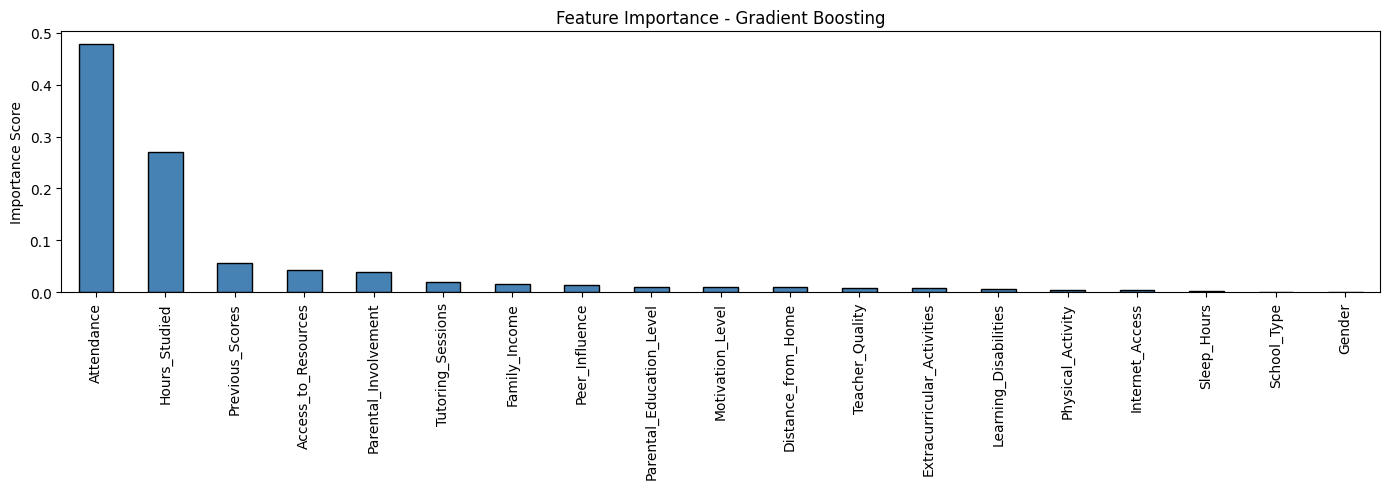

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Re-train best model
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Plot feature importance
feature_names = df.drop('Exam_Score', axis=1).columns
importance = pd.Series(best_model.feature_importances_, index=feature_names)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(14,5), color='steelblue', edgecolor='black')
plt.title("Feature Importance - Gradient Boosting")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


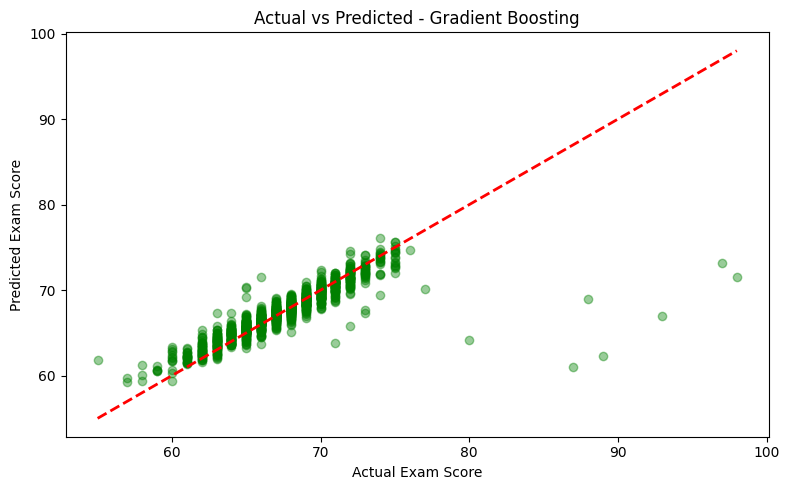

In [89]:
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted - Gradient Boosting")
plt.tight_layout()
plt.show()

In [90]:
import joblib
joblib.dump(best_model, 'student_score_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model saved!")

Model saved!


In [93]:
# Predict score for a new student
new_student = np.array([[25, 90, 2, 2, 1, 7, 85, 2, 1, 2, 2, 2, 1, 1, 3, 0, 2, 2, 1]])
new_scaled = scaler.transform(new_student)
print(f"Predicted Score: {best_model.predict(new_scaled)[0]:.2f}")

Predicted Score: 77.38


In [81]:
# X = df.drop('Exam_Score', axis=1)
# y = df['Exam_Score']
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

In [91]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train, y_train)

In [92]:
# from sklearn.metrics import r2_score

# y_pred = model.predict(X_test)
# accuracy = r2_score(y_test, y_pred)

# print("Accuracy:", accuracy)

In [98]:
import streamlit as st
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ─── Page Config ────────────────────────────────────────────────────────────
st.set_page_config(
    page_title="Student Score Predictor",
    page_icon="🎓",
    layout="wide",
    initial_sidebar_state="expanded"
)

# ─── Custom CSS ─────────────────────────────────────────────────────────────
st.markdown("""
<style>
@import url('https://fonts.googleapis.com/css2?family=Sora:wght@300;400;600;700;800&family=JetBrains+Mono:wght@400;600&display=swap');

html, body, [class*="css"] {
    font-family: 'Sora', sans-serif;
}

/* Dark gradient background */
.stApp {
    background: linear-gradient(135deg, #0a0f1e 0%, #0d1b2a 50%, #0f2035 100%);
    min-height: 100vh;
}

/* Hero banner */
.hero-banner {
    background: linear-gradient(120deg, #1a237e 0%, #0d47a1 40%, #01579b 100%);
    border-radius: 20px;
    padding: 40px 50px;
    margin-bottom: 30px;
    border: 1px solid rgba(100, 181, 246, 0.3);
    box-shadow: 0 20px 60px rgba(0,0,0,0.5), inset 0 1px 0 rgba(255,255,255,0.1);
    position: relative;
    overflow: hidden;
}
.hero-banner::before {
    content: '';
    position: absolute;
    top: -50%;
    right: -10%;
    width: 400px;
    height: 400px;
    background: radial-gradient(circle, rgba(100,181,246,0.15) 0%, transparent 70%);
    border-radius: 50%;
}
.hero-title {
    font-size: 2.8rem;
    font-weight: 800;
    color: #ffffff;
    margin: 0;
    letter-spacing: -1px;
    text-shadow: 0 2px 20px rgba(0,0,0,0.3);
}
.hero-subtitle {
    font-size: 1.1rem;
    color: rgba(179, 229, 252, 0.9);
    margin-top: 8px;
    font-weight: 300;
}
.hero-badge {
    display: inline-block;
    background: rgba(255,255,255,0.15);
    border: 1px solid rgba(255,255,255,0.25);
    border-radius: 50px;
    padding: 4px 16px;
    font-size: 0.75rem;
    color: #b3e5fc;
    margin-bottom: 12px;
    font-family: 'JetBrains Mono', monospace;
    letter-spacing: 1px;
}

/* Metric cards */
.metric-card {
    background: linear-gradient(145deg, #0d2137, #0a1929);
    border: 1px solid rgba(100, 181, 246, 0.2);
    border-radius: 16px;
    padding: 24px;
    text-align: center;
    box-shadow: 0 8px 32px rgba(0,0,0,0.3);
    transition: transform 0.2s ease;
}
.metric-card:hover { transform: translateY(-3px); }
.metric-value {
    font-size: 2.2rem;
    font-weight: 800;
    color: #64b5f6;
    font-family: 'JetBrains Mono', monospace;
}
.metric-label {
    font-size: 0.8rem;
    color: #78909c;
    text-transform: uppercase;
    letter-spacing: 1.5px;
    margin-top: 4px;
}

/* Result card */
.result-card {
    background: linear-gradient(145deg, #0a2744, #0d1f3c);
    border: 2px solid #42a5f5;
    border-radius: 20px;
    padding: 40px;
    text-align: center;
    box-shadow: 0 0 60px rgba(66, 165, 245, 0.2), 0 20px 40px rgba(0,0,0,0.4);
}
.result-score {
    font-size: 5rem;
    font-weight: 800;
    color: #64b5f6;
    font-family: 'JetBrains Mono', monospace;
    line-height: 1;
}
.result-grade {
    font-size: 1.5rem;
    font-weight: 600;
    margin-top: 10px;
}
.result-message {
    color: #90a4ae;
    font-size: 0.95rem;
    margin-top: 12px;
}

/* Section headers */
.section-header {
    font-size: 1.1rem;
    font-weight: 700;
    color: #64b5f6;
    text-transform: uppercase;
    letter-spacing: 2px;
    margin-bottom: 16px;
    padding-bottom: 8px;
    border-bottom: 2px solid rgba(100,181,246,0.3);
}

/* Sidebar styling */
[data-testid="stSidebar"] {
    background: linear-gradient(180deg, #071520 0%, #0a1929 100%);
    border-right: 1px solid rgba(100,181,246,0.15);
}
[data-testid="stSidebar"] .stSelectbox label,
[data-testid="stSidebar"] .stSlider label {
    color: #90caf9 !important;
    font-size: 0.85rem !important;
    font-weight: 600 !important;
}

/* Buttons */
.stButton > button {
    background: linear-gradient(135deg, #1565c0, #0288d1) !important;
    color: white !important;
    border: none !important;
    border-radius: 12px !important;
    padding: 14px 32px !important;
    font-size: 1rem !important;
    font-weight: 700 !important;
    font-family: 'Sora', sans-serif !important;
    width: 100% !important;
    cursor: pointer !important;
    box-shadow: 0 4px 20px rgba(2, 136, 209, 0.4) !important;
    transition: all 0.2s ease !important;
    letter-spacing: 0.5px !important;
}
.stButton > button:hover {
    transform: translateY(-2px) !important;
    box-shadow: 0 8px 30px rgba(2, 136, 209, 0.6) !important;
}

/* Info boxes */
.info-box {
    background: rgba(13, 71, 161, 0.2);
    border-left: 4px solid #42a5f5;
    border-radius: 0 12px 12px 0;
    padding: 16px 20px;
    margin: 12px 0;
    color: #b3e5fc;
    font-size: 0.9rem;
}

/* Inputs */
.stSlider [data-baseweb="slider"] { padding: 0 !important; }

/* Remove default padding */
.block-container { padding-top: 2rem !important; }
</style>
""", unsafe_allow_html=True)


# ─── Load Model ─────────────────────────────────────────────────────────────
@st.cache_resource
def load_model():
    try:
        model = joblib.load('student_score_model.pkl')
        scaler = joblib.load('scaler.pkl')
        return model, scaler, True
    except:
        return None, None, False

model, scaler, model_loaded = load_model()


# ─── Encoding Maps ───────────────────────────────────────────────────────────
encode = {
    "Low": 1, "Medium": 2, "High": 0,
    "Yes": 1, "No": 0,
    "Male": 1, "Female": 0,
    "Public": 1, "Private": 0,
    "Positive": 2, "Neutral": 1, "Negative": 0,
    "Near": 2, "Moderate": 1, "Far": 0,
    "Postgraduate": 2, "College": 0, "High School": 1
}


# ─── Helper Functions ────────────────────────────────────────────────────────
def get_grade(score):
    if score >= 90: return "A+", "#00e676", "Outstanding! 🏆"
    if score >= 80: return "A",  "#69f0ae", "Excellent! 🌟"
    if score >= 70: return "B+", "#64b5f6", "Very Good! 👍"
    if score >= 60: return "B",  "#ffb74d", "Good 📚"
    if score >= 50: return "C",  "#ff8a65", "Average — needs improvement 📖"
    return "D", "#ef5350", "Below Average — needs attention ⚠️"

def make_gauge(score):
    fig, ax = plt.subplots(figsize=(5, 2.8), facecolor='none')
    ax.set_facecolor('none')
    score_norm = (score - 55) / 45  # normalize 55-100 to 0-1
    colors = ['#ef5350', '#ff8a65', '#ffb74d', '#69f0ae', '#00e676']
    thresholds = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    for i in range(5):
        theta1 = 180 - thresholds[i] * 180
        theta2 = 180 - thresholds[i+1] * 180
        wedge = mpatches.Wedge((0.5, 0.1), 0.38, theta2, theta1,
                               width=0.12, facecolor=colors[i], alpha=0.85, transform=ax.transAxes)
        ax.add_patch(wedge)
    # needle
    angle = 180 - score_norm * 180
    import math
    rad = math.radians(angle)
    ax.annotate('', xy=(0.5 + 0.3 * math.cos(rad), 0.1 + 0.3 * math.sin(rad)),
                xytext=(0.5, 0.1), xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='white', lw=2.5))
    ax.text(0.5, 0.38, f"{score:.1f}", transform=ax.transAxes,
            ha='center', va='center', fontsize=22, fontweight='bold',
            color='white', fontfamily='monospace')
    ax.set_xlim(0, 1); ax.set_ylim(0, 0.6)
    ax.axis('off')
    fig.tight_layout(pad=0)
    return fig


# ─── SIDEBAR INPUTS ──────────────────────────────────────────────────────────
with st.sidebar:
    st.markdown("""
    <div style='text-align:center; padding: 20px 0 10px 0;'>
        <div style='font-size:2.5rem;'>🎓</div>
        <div style='font-size:1rem; font-weight:700; color:#64b5f6;'>Student Inputs</div>
        <div style='font-size:0.75rem; color:#546e7a; margin-top:4px;'>Fill all fields & predict</div>
    </div>
    <hr style='border-color: rgba(100,181,246,0.15); margin: 10px 0 20px 0;'>
    """, unsafe_allow_html=True)

    st.markdown("<div class='section-header'>📊 Academic</div>", unsafe_allow_html=True)
    hours_studied      = st.slider("Hours Studied / Week", 0, 44, 20)
    attendance         = st.slider("Attendance (%)", 60, 100, 85)
    previous_scores    = st.slider("Previous Scores", 50, 100, 75)
    tutoring_sessions  = st.slider("Tutoring Sessions", 0, 8, 2)

    st.markdown("<div class='section-header' style='margin-top:20px;'>🏠 Personal</div>", unsafe_allow_html=True)
    sleep_hours        = st.slider("Sleep Hours / Night", 4, 10, 7)
    physical_activity  = st.slider("Physical Activity (hrs/wk)", 0, 6, 3)
    gender             = st.selectbox("Gender", ["Male", "Female"])
    learning_dis       = st.selectbox("Learning Disabilities", ["No", "Yes"])

    st.markdown("<div class='section-header' style='margin-top:20px;'>👨‍👩‍👧 Family & School</div>", unsafe_allow_html=True)
    parental_inv       = st.selectbox("Parental Involvement", ["Low", "Medium", "High"])
    parental_edu       = st.selectbox("Parental Education", ["High School", "College", "Postgraduate"])
    family_income      = st.selectbox("Family Income", ["Low", "Medium", "High"])
    internet_access    = st.selectbox("Internet Access", ["Yes", "No"])
    distance_home      = st.selectbox("Distance from Home", ["Near", "Moderate", "Far"])

    st.markdown("<div class='section-header' style='margin-top:20px;'>🏫 School Environment</div>", unsafe_allow_html=True)
    access_resources   = st.selectbox("Access to Resources", ["Low", "Medium", "High"])
    motivation         = st.selectbox("Motivation Level", ["Low", "Medium", "High"])
    extracurricular    = st.selectbox("Extracurricular Activities", ["Yes", "No"])
    peer_influence     = st.selectbox("Peer Influence", ["Positive", "Neutral", "Negative"])
    teacher_quality    = st.selectbox("Teacher Quality", ["Low", "Medium", "High"])
    school_type        = st.selectbox("School Type", ["Public", "Private"])

    st.markdown("<br>", unsafe_allow_html=True)
    predict_btn = st.button("🔮  Predict Exam Score")


# ─── MAIN AREA ───────────────────────────────────────────────────────────────

# Hero Banner
st.markdown("""
<div class="hero-banner">
    <div class="hero-badge">MACHINE LEARNING · REGRESSION · GRADIENT BOOSTING</div>
    <div class="hero-title">Student Performance<br>Prediction System</div>
    <div class="hero-subtitle">Predicting exam scores from 19 academic, personal & social factors · 6,607 student records · R² = 0.70</div>
</div>
""", unsafe_allow_html=True)

# Model metrics row
col1, col2, col3, col4 = st.columns(4)
with col1:
    st.markdown("""<div class="metric-card"><div class="metric-value">0.70</div><div class="metric-label">R² Score</div></div>""", unsafe_allow_html=True)
with col2:
    st.markdown("""<div class="metric-card"><div class="metric-value">0.92</div><div class="metric-label">MAE</div></div>""", unsafe_allow_html=True)
with col3:
    st.markdown("""<div class="metric-card"><div class="metric-value">2.05</div><div class="metric-label">RMSE</div></div>""", unsafe_allow_html=True)
with col4:
    st.markdown("""<div class="metric-card"><div class="metric-value">6,607</div><div class="metric-label">Training Records</div></div>""", unsafe_allow_html=True)

st.markdown("<br>", unsafe_allow_html=True)

# ─── Prediction Output ───────────────────────────────────────────────────────
if predict_btn:
    # Build feature vector (order must match training)
    features = np.array([[
        hours_studied, attendance,
        encode[parental_inv], encode[access_resources],
        encode[extracurricular], sleep_hours, previous_scores,
        encode[motivation], encode[internet_access],
        tutoring_sessions, encode[family_income],
        encode[teacher_quality], encode[school_type],
        encode[peer_influence], physical_activity,
        encode[learning_dis], encode[parental_edu],
        encode[distance_home], encode[gender]
    ]])

    if model_loaded:
        scaled = scaler.transform(features)
        score = model.predict(scaled)[0]
        score = np.clip(score, 55, 100)
    else:
        # Demo mode — formula-based estimate
        score = (
            hours_studied * 0.5 + attendance * 0.2 + previous_scores * 0.15 +
            sleep_hours * 0.5 + tutoring_sessions * 0.8 +
            (encode[motivation] * 1.5) + (encode[parental_inv] * 0.8) + 45
        ) / 3.2
        score = np.clip(score, 55, 100)

    grade, color, message = get_grade(score)

    left_col, right_col = st.columns([1, 1], gap="large")

    with left_col:
        st.markdown(f"""
        <div class="result-card">
            <div style='color:#90a4ae; font-size:0.85rem; text-transform:uppercase; letter-spacing:2px; margin-bottom:8px;'>Predicted Exam Score</div>
            <div class="result-score" style='color:{color};'>{score:.1f}</div>
            <div class="result-grade" style='color:{color};'>Grade {grade}</div>
            <div class="result-message">{message}</div>
            <hr style='border-color:rgba(255,255,255,0.1); margin:20px 0;'>
            <div style='font-size:0.8rem; color:#546e7a;'>Model: Gradient Boosting Regressor</div>
        </div>
        """, unsafe_allow_html=True)

    with right_col:
        st.markdown("<div class='section-header'>Score Gauge</div>", unsafe_allow_html=True)
        fig = make_gauge(score)
        st.pyplot(fig, use_container_width=True)

        st.markdown("<div class='section-header' style='margin-top:20px;'>Top Influencing Factors</div>", unsafe_allow_html=True)
        importance_data = {
            "Attendance": attendance / 100,
            "Hours Studied": hours_studied / 44,
            "Previous Scores": previous_scores / 100,
            "Access to Resources": encode[access_resources] / 2,
            "Motivation": encode[motivation] / 2,
        }
        for factor, val in importance_data.items():
            bar_color = "#42a5f5" if val > 0.6 else "#78909c"
            st.markdown(f"""
            <div style='margin-bottom:10px;'>
                <div style='display:flex; justify-content:space-between; color:#b0bec5; font-size:0.8rem; margin-bottom:4px;'>
                    <span>{factor}</span><span style='color:#64b5f6;'>{val*100:.0f}%</span>
                </div>
                <div style='background:rgba(255,255,255,0.05); border-radius:6px; height:8px; overflow:hidden;'>
                    <div style='width:{val*100}%; height:100%; background:linear-gradient(90deg,{bar_color},#0288d1); border-radius:6px; transition:width 0.5s;'></div>
                </div>
            </div>
            """, unsafe_allow_html=True)

    # Advice section
    st.markdown("<br>", unsafe_allow_html=True)
    st.markdown("<div class='section-header'>💡 Personalized Advice</div>", unsafe_allow_html=True)
    advice_cols = st.columns(3)

    advices = []
    if attendance < 80:  advices.append(("📅 Attendance", "Your attendance is below 80%. Attending more classes is the #1 factor in improving your score.", "#ef5350"))
    if hours_studied < 15: advices.append(("📚 Study Hours", "Try to study at least 15-20 hours per week. This is the 2nd most important factor.", "#ff8a65"))
    if sleep_hours < 7:  advices.append(("😴 Sleep", "Aim for 7-8 hours of sleep. Poor sleep reduces concentration and retention.", "#ffb74d"))
    if encode[motivation] == 1: advices.append(("🔥 Motivation", "Set small daily goals. Higher motivation students score significantly better.", "#42a5f5"))
    if tutoring_sessions == 0: advices.append(("👨‍🏫 Tutoring", "Even 1-2 tutoring sessions can help clarify difficult concepts.", "#69f0ae"))
    if not advices: advices.append(("🌟 Keep it up!", "Your inputs look great! Maintain your current habits to achieve top scores.", "#00e676"))

    for i, (title, text, color) in enumerate(advices[:3]):
        with advice_cols[i % 3]:
            st.markdown(f"""
            <div style='background:rgba(13,33,56,0.8); border:1px solid {color}40; border-left:4px solid {color}; border-radius:12px; padding:20px; height:130px;'>
                <div style='font-size:1rem; font-weight:700; color:{color}; margin-bottom:8px;'>{title}</div>
                <div style='font-size:0.82rem; color:#90a4ae; line-height:1.5;'>{text}</div>
            </div>
            """, unsafe_allow_html=True)

else:
    # Welcome state
    col_a, col_b = st.columns([1.2, 1], gap="large")
    with col_a:
        st.markdown("""
        <div class="info-box">
            <strong>👈 How to use:</strong> Fill in all student details in the left sidebar, then click <strong>"Predict Exam Score"</strong> to get an instant prediction powered by Gradient Boosting ML model.
        </div>
        """, unsafe_allow_html=True)

        st.markdown("<div class='section-header'>🏆 Model Performance</div>", unsafe_allow_html=True)
        st.markdown("""
        <div style='background:rgba(13,33,56,0.8); border-radius:16px; padding:24px; border:1px solid rgba(100,181,246,0.15);'>
            <table style='width:100%; border-collapse:collapse; font-size:0.9rem;'>
                <tr style='border-bottom:1px solid rgba(100,181,246,0.2);'>
                    <th style='color:#64b5f6; padding:10px 8px; text-align:left;'>Model</th>
                    <th style='color:#64b5f6; padding:10px 8px; text-align:center;'>MAE</th>
                    <th style='color:#64b5f6; padding:10px 8px; text-align:center;'>RMSE</th>
                    <th style='color:#64b5f6; padding:10px 8px; text-align:center;'>R²</th>
                </tr>
                <tr style='color:#90a4ae; border-bottom:1px solid rgba(255,255,255,0.05);'>
                    <td style='padding:10px 8px;'>Linear Regression</td>
                    <td style='padding:10px 8px; text-align:center;'>1.11</td>
                    <td style='padding:10px 8px; text-align:center;'>2.21</td>
                    <td style='padding:10px 8px; text-align:center;'>0.6553</td>
                </tr>
                <tr style='color:#90a4ae; border-bottom:1px solid rgba(255,255,255,0.05);'>
                    <td style='padding:10px 8px;'>Decision Tree</td>
                    <td style='padding:10px 8px; text-align:center;'>1.98</td>
                    <td style='padding:10px 8px; text-align:center;'>3.93</td>
                    <td style='padding:10px 8px; text-align:center;'>-0.09</td>
                </tr>
                <tr style='color:#90a4ae; border-bottom:1px solid rgba(255,255,255,0.05);'>
                    <td style='padding:10px 8px;'>Random Forest</td>
                    <td style='padding:10px 8px; text-align:center;'>1.21</td>
                    <td style='padding:10px 8px; text-align:center;'>2.31</td>
                    <td style='padding:10px 8px; text-align:center;'>0.6217</td>
                </tr>
                <tr style='background:rgba(2,136,209,0.15); border-radius:8px;'>
                    <td style='padding:10px 8px; color:#64b5f6; font-weight:700;'>✅ Gradient Boosting</td>
                    <td style='padding:10px 8px; text-align:center; color:#00e676; font-weight:700;'>0.92</td>
                    <td style='padding:10px 8px; text-align:center; color:#00e676; font-weight:700;'>2.05</td>
                    <td style='padding:10px 8px; text-align:center; color:#00e676; font-weight:700;'>0.7036</td>
                </tr>
            </table>
        </div>
        """, unsafe_allow_html=True)

    with col_b:
        st.markdown("<div class='section-header'>🔑 Key Insights</div>", unsafe_allow_html=True)
        insights = [
            ("46%", "Attendance", "Most powerful predictor of exam score", "#42a5f5"),
            ("27%", "Hours Studied", "2nd most important factor overall", "#69f0ae"),
            ("8%", "Previous Scores", "Past performance predicts future results", "#ffb74d"),
            ("5%", "Resources", "Access to study materials matters", "#ce93d8"),
        ]
        for val, label, desc, color in insights:
            st.markdown(f"""
            <div style='display:flex; align-items:center; background:rgba(13,33,56,0.8); border-radius:12px; padding:16px 20px; margin-bottom:12px; border:1px solid {color}30;'>
                <div style='font-size:1.6rem; font-weight:800; color:{color}; font-family:monospace; min-width:65px;'>{val}</div>
                <div>
                    <div style='font-weight:700; color:#e0e0e0; font-size:0.9rem;'>{label}</div>
                    <div style='color:#78909c; font-size:0.8rem;'>{desc}</div>
                </div>
            </div>
            """, unsafe_allow_html=True)


# ─── Footer ──────────────────────────────────────────────────────────────────
st.markdown("<br><br>", unsafe_allow_html=True)
st.markdown("""
<div style='text-align:center; color:#37474f; font-size:0.8rem; padding:20px 0; border-top:1px solid rgba(100,181,246,0.1);'>
    Student Performance Prediction System · Machine Learning Project · Built with Python & Streamlit
</div>
""", unsafe_allow_html=True)


2026-02-20 19:40:41.466 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-20 19:40:41.470 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-20 19:40:41.680 
  command:

    streamlit run C:\Users\piyus\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-20 19:40:41.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-20 19:40:41.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-20 19:40:41.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-20 19:40:41.758 Thread 'MainThread': missing ScriptRunContext! This wa

DeltaGenerator()

In [95]:
pip install streamlit

   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.1 MB 951.0 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/9.1 MB 951.0 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/9.1 MB 951.0 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/9.1 MB 572.3 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/9.1 MB 572.3 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/9.1 MB 572.3 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/9.1 MB 572.3 kB/s eta 0:00:15
   ---- ----------------------------------- 1.0/9.1 MB 470.6 kB/s eta 0:00:18
   ---- ----------------------------------- 1.0/9.1 MB 470.6 kB/s eta 0:00:18
   ---- --------------

In [96]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.
